In [1]:
from numpy.random import choice
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [31]:
def count_frequencies(data, relative=False):
    counter = {}
    for element in data:
        if element not in counter:
            # get this element for the first time
            counter [element] = 1
        else:
            counter[element] += 1

    if relative:
        for element in counter:
            counter[element] /= len(data)

    return counter

sample =[choice([1, 2, 4], p=[0.2, 0.5, 0.3]) for _ in range(1000)]
print(count_frequencies(sample))
print(count_frequencies(sample, True))

# numpy array
sample = choice([1, 2, 4], p=[0.2, 0.5, 0.3], size=1000)
# print(sample)

{1: 195, 2: 484, 4: 321}
{1: 0.195, 2: 0.484, 4: 0.321}


<BarContainer object of 3 artists>

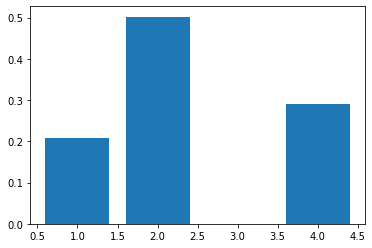

In [32]:
freqs = count_frequencies(sample, relative=True)
plt.bar(list(freqs.keys()),list(freqs.values()))

In [33]:
from numpy.random import binomial
from scipy.stats import binom

In [41]:
sample = binomial(10, 0.3, size=1000) # toss coin 10 times, probability of sucess (for example head) is 0.3, sample size = 1000
binom_freqs = count_frequencies(sample, relative=True)

In [42]:
X = binom(10, 0.3)
X.pmf(1)

0.12106082100000018

<BarContainer object of 9 artists>

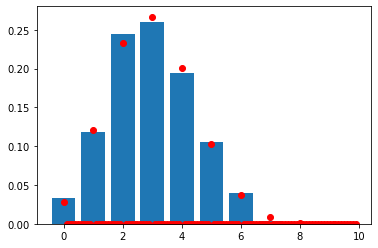

In [44]:
x = np.arange(0, 10, 0.1)
plt.plot(x, X.pmf(x), 'o', color='red')
plt.bar(list(binom_freqs.keys()),list(binom_freqs.values()))

<BarContainer object of 10 artists>

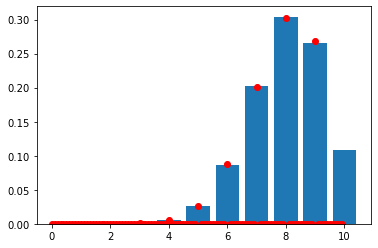

In [49]:
n = 10
p = 0.8
sample = binomial(n, p, size=100000)
X = binom(n, p)
binom_freqs = count_frequencies(sample, relative=True)
plt.plot(x, X.pmf(x), 'o', color='red')
plt.bar(list(binom_freqs.keys()),list(binom_freqs.values()))

In [50]:
from scipy.stats import poisson

0.016563608480614445


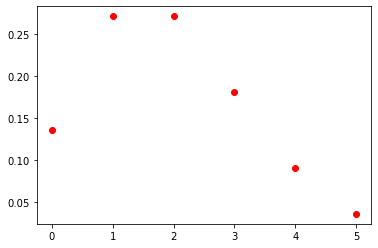

In [64]:
X = [0, 1, 2, 3, 4, 5]
lmbda = 2
poisson_pd = poisson.pmf(X, mu=lmbda)
plt.plot(X, poisson_pd, 'o', color='red')
print(1-sum(poisson_pd))

[0.13533528 0.40600585 0.67667642 0.85712346 0.94734698 0.98343639
 0.99546619 0.99890328 0.99976255 0.9999535  0.99999169]


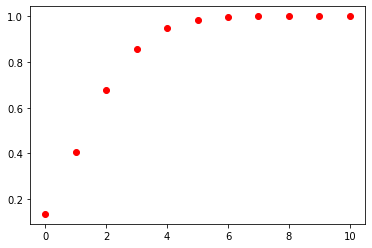

In [70]:
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ,10]
prob = poisson.cdf(X, mu=2)
print(prob)
plt.plot(X, prob, 'o', color='red')

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


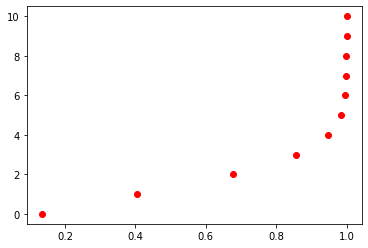

In [72]:
ppf = poisson.ppf(prob, mu=2)
print(ppf)
plt.plot(prob, ppf, 'o', color='red')

In [77]:
print(poisson.ppf(0.95, mu=2))

5.0


In [80]:
a = binom(5, 0.5).rvs()

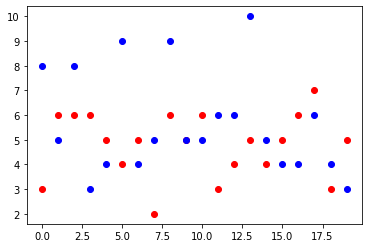

In [143]:
import random
import matplotlib.pyplot as plt
from itertools import product

def X(outcome):
    return outcome.count('H')
    

def rbinom_fair(trials):

    p = 0.5  # probability of sucess (head)
    omega = list(product('HT', repeat=trials))
    random_choice = random.choice(omega)
    
    return X(random_choice)  

x = [i for i in range(20)]
trails = 10
sample = [rbinom_fair(trails) for i in range(20)]
plt.plot(x, sample, 'o', color='red')
sample2 = [binom(trails, 0.5).rvs() for i in range(20)]
plt.plot(x, sample2, 'o', color='blue')

In [144]:
rbinom_fair(10)

2

In [161]:
trials = 10
prob = 0.3
size = 5
a = binom(trials, prob).rvs(size)
print(a)

[1 4 1 5 4]


In [211]:
from numpy.random import choice
from scipy.special import comb
import matplotlib.pyplot as plt

from scipy.stats import binom


def rbinom(trials, prob, size):
    
    outcomes = [i for i in range(trials+1)] # number of heads
    p = [] # probabilities
    
    for outcome in outcomes:
        outcome_p = comb(trials, outcome)*(prob**outcome)*((1-prob)**(trials-outcome))
        p.append(outcome_p)
    
    return choice(a=outcomes, p=p, size=size)

    
    
    

In [212]:
rbinom(10, 0.3, 5) # expecting something like `array([4, 1, 3, 2, 1])`

0.9999999999999992


array([4, 4, 3, 2, 1])

In [217]:
def rbinom_with_bernoulli(trials, prob):
    y = []
    
    for i in range(trials):
        random_choice = choice([0, 1], p=[1-prob, prob])
        y.append(random_choice)
        
    return sum(y)
      

In [218]:
a = rbinom_with_bernoulli(10, 0.3)
print(a)

2


In [240]:
def rgeom(p):
    
    keep_tossing = True # head is 1
    x = []
    
    while keep_tossing:
        toss = choice([0, 1], p=[1-p, p])
        x.append(toss)
        if 1 in x:
            keep_tossing = False
            
    return len(x)
        

In [241]:
a = rgeom(0.3)
print(a)

3


In [1]:
from math import factorial

In [26]:
def multinomial_likelihood(probs, freqs):
    
    n = len(freqs.keys())
    f_denom = 1.
    p_total = -1
    
    for key, f in freqs.items():
        f_denom *= factorial(f)
        
    for key, p in probs.items():
        if key in freqs:
            f = freqs[key]
            if p_total == -1:
                p_total = p**f
            else:
                p_total *= p**f
            
    return (factorial(n)/f_denom)*p_total

In [27]:
print(multinomial_likelihood(probs={'a': 0.2, 'b': 0.5, 'c': 0.3}, freqs={'a': 2, 'b': 1, 'c': 2}))
print(multinomial_likelihood(probs={'a': 0.2, 'b': 0.1, 'c': 0.3, 'd': 0.4}, freqs={'a': 2, 'b': 1, 'c': 2}))
                             
# assert abs(multinomial_likelihood(probs={'a': 0.2, 'b': 0.5, 'c': 0.3}, freqs={'a': 2, 'b': 1, 'c': 2}) - 0.0027) < 0.000001

0.0027000000000000006
0.0005400000000000001


In [ ]:
def get_freqs(text, relative=False):
    # your code here
    counter = dict()
    
    for char in text:
        if char not in counter:
            counter[char] = 1
        else:
            counter[char] += 1

    if relative:
        for char in counter:
            counter[char] /= len(text)
            
    return counter

In [ ]:
lang_to_probs = dict()
langs = ['English', 'Italian', 'Spanish', 'German', 'French', 'Polish', 'Portuguese']

for l in langs:    
    l_file = "data/" + l + ".txt"
    with open(l_file) as f:
        data = f.read()
    
    lang_to_probs[l] = get_freqs(data, relative=True)

In [ ]:
from math import factorial

def multinomial_likelihood(probs, freqs):
    
    n = len(freqs.keys())
    f_denom = 1.
    p_total = -1
    
    for key, f in freqs.items():
        f_denom *= factorial(f)
        
    for key, p in probs.items():
        if key in freqs:
            f = freqs[key]
            if p_total == -1:
                p_total = p**f
            else:
                p_total *= p**f
            
    return (factorial(n)/f_denom)*p_total

In [ ]:
def multinomial_likelihood_without_coeff(probs, freqs):
    p_total = -1
        
    for key, p in probs.items():
        if key in freqs:
            f = freqs[key]
            if p_total == -1:
                p_total = p**f
            else:
                p_total *= p**f
            
    return p_total

In [ ]:
from math import log

def log_likelihood_without_coeff(probs, freqs):
    p_total = -1
        
    for key, p in probs.items():
        if key in freqs:
            f = freqs[key]
            if p_total == -1:
                p_total = f*log(p)
            else:
                p_total += f*log(p)
            
    return p_total

In [11]:
a = [1, 1, 2, 3, 5, 5, 6]
print(np.quantile(a, 0.25))
print(np.quantile(a, 0.75))

1.5
5.0


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


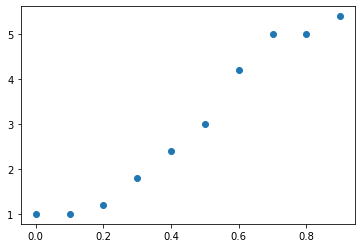

In [7]:
i = np.arange(0, 1, 0.1)
print(i)
plt.plot(i, np.quantile(a,i), 'o')